Primero importamos las librerías.

In [ ]:
import numpy as np
import pandas as pd 


### CREACIÓN DE DATOS SINTÉTICOS
Para poder crear un dataset con suficiente cantidad de datos, se generan de manera aleatoria utilizando rangos típicos de cada una de las características.


In [ ]:
num_personas = 40

data = {
    'sexo': np.random.choice(['Hombre', 'Mujer'], num_personas),
    'edad': np.random.randint(20, 61, num_personas),

    'temperatura_ambiente': np.random.uniform(20, 31, num_personas),
    'fumador': np.random.choice([True, False], num_personas),
    'deportista': np.random.choice([True, False], num_personas),
    'tiempo_hasta_conductancia_max': np.random.randint(100, 181, num_personas),
    'tiempo_hasta_frecuencia_cardiaca_max': np.random.randint(35, 61, num_personas),
    'tiempo_conductancia_recuperacion': np.random.randint(120, 241, num_personas),
    'tiempo_frecuencia_recuperacion': np.random.randint(20, 41, num_personas),
    'momento_dia': np.random.choice(['Mañana', 'Tarde', 'Noche'], num_personas),
     'frecuencia_cardiaca_inicial': np.concatenate([
        np.random.randint(45, 61, int(0.65 * num_personas)),
        np.random.choice([np.random.randint(20, 46), np.random.randint(60, 66)], int(0.35 * num_personas))
    ]),
    'conductancia_inicial': np.random.randint(60, 91, num_personas),
}

### CREACIÓN DEL DATASET


In [ ]:
df = pd.DataFrame(data)
df.head()

Se agregan valores de conductancia de la piel y frecuencia cardíaca para cada persona.

In [ ]:

# Agregamos la columna de conductancia maxima y condición que sea mayor que inicial
df['conductancia_maxima'] = np.random.randint(90, 121, num_personas)
df['conductancia_maxima'] = np.maximum(df['conductancia_maxima'], df['conductancia_inicial'])

# Agregamos la columna de frecuencia cardiaca maxima y condición que sea mayor que inicial
df['frecuencia_cardiaca_maxima'] = np.random.randint(90, 151, num_personas)
df['frecuencia_cardiaca_maxima'] = np.maximum(df['frecuencia_cardiaca_maxima'], df['frecuencia_cardiaca_inicial'])

Para que los datos sintéticos sean realistas, se extraen rangos típicos de valores de frecuencia cardíaca y conductancia de la piel de literatura científica.
Se modifican los valores para fumadores y deportistas.

In [ ]:
# Correlación entre conductncia y temperatura
df['conductancia_inicial'] += df['temperatura_ambiente'] * 2

# Correlación entre frecuencia cardíaca y persona que fuma
df.loc[df['fumador'], 'frecuencia_cardiaca_inicial'] += 20
df.loc[df['fumador'], 'frecuencia_cardiaca_maxima'] += 10

# Correlación entre deporrtista y frecuencia cardíaca
df.loc[df['deportista'], 'frecuencia_cardiaca_inicial'] -= 10
df.loc[df['deportista'], 'frecuencia_cardiaca_maxima'] -= 20

# Correlación temperatura y frecuencia cardíaca
df['frecuencia_cardiaca_inicial'] += df['temperatura_ambiente'] * 0.5
df['frecuencia_cardiaca_maxima'] += df['temperatura_ambiente'] * 0.3

# Correlación temperatura y frecuencia cardíaca
df['conductancia_inicial'] += df['temperatura_ambiente'] * 0.5
df['conductancia_maxima'] += df['temperatura_ambiente'] * 0.3

# Correlación entre frecuencia cardíaca y género
df['frecuencia_cardiaca_inicial'] += np.where(df['sexo'] == 'Mujer', 3, -3)
df['frecuencia_cardiaca_maxima'] += np.where(df['sexo'] == 'Mujer', 3, -3)

#Correlación entre conductancia y género
df['conductancia_inicial'] += np.where(df['sexo'] == 'Mujer', 20, 0)
df['conductancia_maxima'] += np.where(df['sexo'] == 'Mujer', 20, 0)

# Correlación entre tiempo y fumador
df.loc[df['fumador'], 'tiempo_hasta_frecuencia_cardiaca_max'] -= 15

# Correlación entre tiempo y deportista
df.loc[df['deportista'], 'tiempo_frecuencia_recuperacion'] -= 10

# Correlación leve entre tiempo_frecuencia_recuperacion y ser fumador
df.loc[df['fumador'], 'tiempo_frecuencia_recuperacion'] += 15

Por último se asignan nombres a cada fila con una lista por compresión.

In [ ]:
df.index = ['persona{}'.format(i) for i in range(1, num_personas + 1)]


### GENERAR MAS PERSONAS
Una vez creado los datos realistas, se procede a ejecutar un ciclo para agregar personas al conjunto de datos.

In [ ]:
num_personas = 4000  # Número total de personas
num_reales = len(df)  # Número de personas verdaderas

for i in range(num_reales, num_personas):
    persona_anterior = df.iloc[np.random.randint(num_reales)]  # Seleccionar una persona existente aleatoriamente
    nueva_persona = persona_anterior.copy()  # Copiar los valores de la persona seleccionada
    # Agregar ruido a los valores de la nueva persona
    # Cada línea genera un valor aleatorio dentro del rango especificado, se usa para agregar ruido a los valores de la persona seleccionada
    # y generar una nueva persona con datos relacionados.
    ruido_conductancia = np.random.uniform(-2, 2)
    ruido_frecuencia = np.random.uniform(-5, 5)
    ruido_temperatura = np.random.uniform(-4, 4)
    ruido_conductancia_maxima = np.random.uniform(-3, 3)
    ruido_frecuencia_maxima = np.random.uniform(-3, 3)
    ruido_tiempo_conductancia_max = np.random.uniform(-5, 5)
    ruido_tiempo_frecuencia_max = np.random.uniform(-2, 2)
    ruido_tiempo_conductancia_recuperacion = np.random.uniform(-5, 5)
    ruido_tiempo_frecuencia_recuperacion = np.random.uniform(-2, 2)

    # Acá se agrega intensionalmente correlación a la frec cardiaca con ser fumador

    if persona_anterior['fumador']:

        ruido_conductancia = abs(ruido_conductancia)
        ruido_frecuencia = abs(ruido_frecuencia)
        ruido_conductancia_maxima = abs(ruido_conductancia_maxima)
        ruido_frecuencia_maxima = abs(ruido_frecuencia_maxima)
        ruido_tiempo_conductancia_max = abs(ruido_tiempo_conductancia_max)
        ruido_tiempo_frecuencia_max = abs(ruido_tiempo_frecuencia_max)
        ruido_tiempo_conductancia_recuperacion = abs(ruido_tiempo_conductancia_recuperacion)
        ruido_tiempo_frecuencia_recuperacion = abs(ruido_tiempo_frecuencia_recuperacion)

    # Cada línea suma el valor de ruido correspondiente a una variable al valor de la columna de la nueva persona

    nueva_persona['conductancia_inicial'] += ruido_conductancia
    nueva_persona['frecuencia_cardiaca_inicial'] += ruido_frecuencia
    nueva_persona['temperatura_ambiente'] += ruido_temperatura
    nueva_persona['conductancia_maxima'] += ruido_conductancia_maxima
    nueva_persona['frecuencia_cardiaca_maxima'] += ruido_frecuencia_maxima
    nueva_persona['tiempo_hasta_conductancia_max'] += ruido_tiempo_conductancia_max
    nueva_persona['tiempo_hasta_frecuencia_cardiaca_max'] += ruido_tiempo_frecuencia_max
    nueva_persona['tiempo_conductancia_recuperacion'] += ruido_tiempo_conductancia_recuperacion
    nueva_persona['tiempo_frecuencia_recuperacion'] += ruido_tiempo_frecuencia_recuperacion


    # Se agregan las nuevas personas al DataFrame
    # El argumento ignore_index=True reajusta los índices correctamente después de agregar la nueva fila.
    df = df.append(nueva_persona, ignore_index=True)
    # Le ponemos nombre a las filas utilizando listas de comprencion de pythons
df.index = ['persona{}'.format(i) for i in range(1, num_personas + 1)]

<ipython-input-30-b5381312e6df>:48: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(nueva_persona, ignore_index=True)
<ipython-input-30-b5381312e6df>:48: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(nueva_persona, ignore_index=True)


En el siguiente algoritmo, creamos tres tipos de tratamientos. Para demostrar el funcionamiento del modelo, se realizará con un sesgo teniendo en cuenta sobre todo el deporte y teniendo en cuenta la teoría cite/, que en un 80% de las personas, el mejor tratamiento a corto plazo y casi inmediato es la respiración controlada.

In [ ]:
prob_respirar = 0.5
prob_musica = 0.2
prob_caminar = 0.3

# Sesgo según si hace deportes o no
tratamientos_deportistas = ['respirar'] * int(prob_respirar * len(df))
tratamientos_no_deportistas = np.random.choice(['respirar', 'musica', 'caminar'], size=len(df) - len(tratamientos_deportistas),
                                               p=[prob_musica / (prob_musica + prob_caminar + prob_respirar),
                                                  prob_caminar / (prob_musica + prob_caminar + prob_respirar),
                                                  prob_respirar / (prob_musica + prob_caminar + prob_respirar)])

tratamientos = np.concatenate((tratamientos_deportistas, tratamientos_no_deportistas))
np.random.shuffle(tratamientos)

df['tratamiento'] = tratamientos

In [ ]:
df.head()

In [ ]:
df.shape

In [ ]:
df.info()

In [ ]:
df.describe()

### AGREGAR ERRORES DE DATOS
Cuando se importan archivos de gran volumenes de datos, hay muchos incompletos, perdidos o fuera de rango. Esto se simula con la siguiente línea donde se agregan datos 'nan' que es un tipo de datos de python.

In [ ]:
# Función para introducir datos faltantes (NaN), a razón de un 10%
def meter_nan (value, prob_nan=0.01):
    if np.random.rand() < prob_nan:
        return np.nan
    else:
        return value

# Le aclaramos a que columas introducir los datos
columnas_df = ['frecuencia_cardiaca_inicial', 'conductancia_inicial',
                        'temperatura_ambiente', 'frecuencia_cardiaca_maxima',
                        'tiempo_hasta_conductancia_max', 'tiempo_hasta_frecuencia_cardiaca_max',
                        'tiempo_conductancia_recuperacion', 'tiempo_frecuencia_recuperacion']

for columna in columnas_df:
    df[columna] = df[columna].apply(lambda x: meter_nan(x))

El siguiente código es casi igual al anterior pero in este caso introducimos valores fuera de rango.

In [ ]:
# Función para introducir outliers
def meter_outlier(valor, outlier_prob=0.08, outlier_rango=(150, 200)):
    if np.random.rand() < outlier_prob:
        return np.random.randint(outlier_rango[0], outlier_rango[1] + 1)
    else:
        return valor

# Le aclaramos a que columas introducir los dato
columnas_outliers = ['frecuencia_cardiaca_inicial', 'conductancia_inicial',
                         'temperatura_ambiente', 'frecuencia_cardiaca_maxima']

for columna in columnas_outliers:
    df[columna] = df[columna].apply(lambda x: meter_outlier(x))

### LIMPIEZA DE DATOS
Para poder entrenar un modelo de predicción, es necesario que el Data set no esté contaminado. Se realiza la limpieza de valores erróneos, perdidos o que se encuentren fuera de rango adecuado (outliers), también se modifican los de otro tipo de variable no declarado o apto para realizar algún cálculo.
Para ello se analiza el contenido de las columnas con diferentes herramientas de Pandas.

Iniciamos definiendo las variables numericas y transformarlas a variables enteras.

In [ ]:
# Se crea una variable con todas las columnas numéricas asi no escribimos el código una por una
columnas_numericas = ['conductancia_inicial', 'frecuencia_cardiaca_inicial', 'temperatura_ambiente',
                      'frecuencia_cardiaca_maxima', 'tiempo_hasta_conductancia_max',
                      'tiempo_hasta_frecuencia_cardiaca_max', 'tiempo_conductancia_recuperacion',
                      'tiempo_frecuencia_recuperacion','conductancia_maxima']
df[columnas_numericas] = df[columnas_numericas].astype(int)

Se analiza que tipos de datos tiene la tabla para cada categoría y qué porcentaje de ellos es erróneo o perdido.

In [ ]:
# Análisis estadístico básico del contenido
df.describe()

In [ ]:
# Análisis informativo de cantidad de nulos y tipo de variable
df.info()

In [ ]:
import seaborn as sns
import matplotlib.pylab as plt

Mediante el grafico de bigotes de la libreria de seaborn, se aplica el codigo necesario para visualizar valores extremos de todas las variables numéricas.

In [ ]:
# Crear un único gráfico de caja con las columnas numéricas en dos filas
fig, ax = plt.subplots(3, 3, figsize=(20, 10))

for i, columna in enumerate(columnas_numericas):
    sns.boxplot(data=df, x=columna, ax=ax[i // 3, i % 3], color='green')

plt.tight_layout()
plt.show()

En las gráficas se pueden observar valores fuera de rango en algunas categorías. Además, se visualiza de manera gráfica el rango de valores de cada categoría y su media.

Teniendo en cuenta que existen valores NaN y outliers, se procede a limpiarlos.
Se puede realizar de diversas maneras o métodos. En éste caso a modo de demostración, se emplea para los outliers el reemplazo por la media y para los valores Nan directamente la eliminación de la persona ('dropear')

Las filas que contengan algún valor Nan, se dropean sencillamente con una función de Pandas. Se vuelve a analizar los datos para corroborar que se hayan eliminado los nulos.

In [ ]:
df = df.dropna()

Se crea una función que reconozca los valores outliers perteneciente a las variables numéricas y los reeemplace por la media calculada con los valores de la columna que no son outliers.

In [ ]:
# Función para identificar outliers y reemplazarlos por la media
def reemplazar_outliers_por_media(columna):
    q25, q75 = columna.quantile(q=[0.25, 0.75])
    rango_inter = q75 - q25
    min_val = q25 - 1.5 * rango_inter
    max_val = q75 + 1.5 * rango_inter
    mascara = (columna >= min_val) & (columna <= max_val)
    media_columna = columna[mascara].mean()
    columna.loc[~mascara] = media_columna
    return columna

Ahora con un ciclo for se reemplaza cada outliers por la media en cada columna

In [ ]:
for columna in columnas_numericas:
    df[columna] = reemplazar_outliers_por_media(df[columna])

Se realiza nuevamente el análisis mediante un gráfico de caja (boxplot)

In [ ]:
fig, ax = plt.subplots(3, 4, figsize=(20, 10))

for i, columna in enumerate(columnas_numericas):
    sns.boxplot(data=df, x=columna, ax=ax[i // 4, i % 4], color='green')

plt.tight_layout()
plt.show()

Por último transformamos los valores flotantes en variables enteras.

In [ ]:
df[columnas_numericas] = df[columnas_numericas].astype(int)

### VISUALIZACIÓN DE LOS DATOS
En primr lugar se realiza nuevamente un chequeo de cantidad de datos, columnas y variables para asegurar que no falta información o que se haya cambiado el formato luego de la limpieza.


In [ ]:
df.shape

In [ ]:
df.info()

Si bien se achicó el volumen de datos, se confirma que el modelo trabaje sobre valores reales.

Primero se importan las librerías de visualización, en el trabajo se utilizan matplotlib y seaborn

In [ ]:
import seaborn as sns
import matplotlib.pylab as plt

Mediante la librería de Seaborn se puede visualizar los datos numéricos en una matriz de correlación utilizando un heatmap, para tener una primera impresión de los datos relevantes. En este caso se crea una máscara para presentar los datos en forma de matriz triangular.

In [ ]:
correlation_matrix = df.corr()
mask = np.triu(np.ones_like(correlation_matrix, dtype=bool))
# Crear un gráfico de matriz de correlación (heatmap)
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', mask=mask)
plt.title('Matriz de Correlación')
plt.show()

Colores mas nítidos se corresponden con altas correlaciones. Para las tonalidades del rojo, con proporcionalidad directa. Viceversa para los tonos de azul.

Segun el tipo de variable se puederealizar infinidad de gráficas para visualizar los datos y realizar análisis estadístico entre ellos.
A continuación se mostrarán diferentes ejemplos.

El siguiente gráfico muestra la distribución de género en la cantidad total de personas

In [ ]:
plt.figure(figsize=(6, 4))
sns.countplot(data=df, x='sexo', palette='pastel')
plt.xlabel('Género'); plt.ylabel('Cantidad de Personas'); plt.title('Distribución de Género')
plt.show()

In [ ]:
plt.figure(figsize=(8, 6))
sns.histplot(data=df, x='frecuencia_cardiaca_inicial', hue='sexo', bins=20, kde=True, palette='muted')
plt.xlabel('Frecuencia Cardíaca Inicial'); plt.ylabel('Personas'); plt.title('Histograma de Frecuencias Cardiacas por Género')
plt.legend(title='Género', labels=['Mujer', 'Hombre'])
plt.show()

In [ ]:
plt.figure(figsize=(8, 6))
sns.violinplot(data=df, x='deportista', y='frecuencia_cardiaca_inicial', palette='Set3')
plt.xlabel('Deportista');plt.ylabel('Frecuencia Cardíaca Inicial'); plt.title('Distribución de Frecuencias Cardíacas Iniciales para Deportistas y No Deportistas')
plt.xticks(ticks=[0, 1], labels=['No Deportista', 'Deportista'])
plt.show()

In [ ]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='frecuencia_cardiaca_inicial', y='frecuencia_cardiaca_maxima', hue='fumador', palette='plasma')
plt.xlabel('Frecuencia Cardiaca Inicial');plt.ylabel('Frecuencia Cardiaca Final')
plt.show()

In [ ]:
plt.figure(figsize=(12, 6))
sns.boxplot(data=df, x='fumador', y='tiempo_frecuencia_recuperacion', hue='deportista')
plt.xlabel('Fumador');plt.ylabel('Tiempo de Recuperación de Frecuencia')
plt.legend(title='Deportista', loc='upper right')
plt.show()

In [ ]:
plt.figure(figsize=(9, 5))
sns.violinplot(data=df, x='fumador', y='tiempo_hasta_frecuencia_cardiaca_max', hue='deportista', split=True)
plt.xlabel('Fumador');plt.ylabel('Tiempo hasta Frecuencia Cardíaca Máxima')
plt.legend(title='Deportista', loc='upper right')
plt.show()

In [ ]:
plt.figure(figsize=(6, 4))
sns.histplot(data=df, x='temperatura_ambiente', bins=20, kde=True, color='skyblue')
plt.xlabel('Temperatura Ambiente');plt.ylabel('Frecuencia')
plt.show()

In [ ]:
plt.figure(figsize=(8, 6))
sns.boxplot(data=df, x='sexo', y='conductancia_inicial', palette='Set1')
plt.xlabel('Género');plt.ylabel('Conductancia Inicial')
plt.show()

In [ ]:
promedios = df.groupby(['deportista', 'fumador'])['tiempo_hasta_conductancia_max'].mean().reset_index()

plt.figure(figsize=(8, 3.5))
sns.barplot(x='deportista', y='tiempo_hasta_conductancia_max', hue='fumador', data=promedios, palette='Set2')
plt.xlabel('Deportista');plt.ylabel('Tiempo hasta Conductancia Máxima Promedio');plt.title('Tiempo hasta Conductancia Máxima por Deportista y Fumador')
plt.legend(title='Fumador', loc='upper right')
plt.show()

In [ ]:
tratamiento_counts = df['tratamiento'].value_counts()

plt.figure(figsize=(3, 3))
plt.pie(tratamiento_counts, labels=tratamiento_counts.index, autopct='%1.1f%%', startangle=90)
plt.axis('equal')  # Hace que el gráfico de torta sea un círculo.
plt.show()

In [ ]:
columnas_categorias = ['momento_dia', 'tratamiento']

fig, ax = plt.subplots(figsize=(8, 3.5))
sns.countplot(data=df, x=columnas_categorias[0], hue=columnas_categorias[1], ax=ax)
plt.xticks(rotation=0, fontsize=10)
plt.yticks(rotation=0, fontsize=10)
plt.xlabel(columnas_categorias[0], fontsize=10)
plt.ylabel('Cantidad de personas', fontsize=10)
plt.title(f'Countplot de {columnas_categorias[0]} con respecto a {columnas_categorias[1]}', fontsize=10)
plt.legend(title=columnas_categorias[1])
plt.show()

##MODELO DE CLASIFICACIÓN
El objetivo del modelo es aprender de la base de datos encontrando patrones entre las características para predecir el mejor tratamiento a la persona que utiliza el programa. El usuario mide sus parámetros y selecciona las características propias, el algoritmo arroja el resultado según lo aprendido.
Los modelos que se desarrollan a continuación son de clasificación y utiliza el Aprendizaje Supervisado. Esto significa que se necesitan dos variables: una para las características (features) y otra para el resultado objetivo (target). El modelo aprenderá a clasificar el target basándose en las características, lo que permitirá predecir el resultado para nuevas personas con solo conocer sus características.
Se entrena un árbol de decisión y un algoritmo KNN.




###DIVISIÓN FEATURES-TARGET
El primer paso es crear dos DataFrame, uno con los datos o caracteríasticas (en el código definido como 'X') y otro que contiene las etiquetas o target (definido como 'y'). Ambos deberán coincidir en número de filas, las columnas de 'X' dependerá de la cantidad de características que el programador desea incluir al modelo y evidentemente 'y' es una matriz columna.

In [ ]:
# Preparación de los datos (X contiene las características y y contiene las etiquetas o tratamientos)
X = df[['frecuencia_cardiaca_inicial', 'frecuencia_cardiaca_maxima', 'conductancia_inicial', 'conductancia_maxima',
        'fumador', 'deportista', 'sexo','tiempo_conductancia_recuperacion','tiempo_frecuencia_recuperacion']]
y = df['tratamiento']

In [ ]:
X.head()

In [ ]:
y.head()

### CODIFICACIÓN DE LOS DATOS
Para poder relacionar las variables categóricas en la matriz de correlación y para programar en instancia final el modelo de predicción es necesario codificar las categorías en numeros.
Con el uso de la librería OneHotEncoder se realiza la codificación. El código asigna un valor booleano por categoría a cada persona y genera una columna con dicho valor. Por lo tanto, se generarán tantas columnas como variables categoricas y cantidad de categorías que constutuyan la variable.

In [ ]:
# Se llama a la librería
from sklearn.preprocessing import OneHotEncoder

En la siguiente línea se entrena el modelo codificador, se generan las nuevas columnas y se eliminan las categóricas del DataFrame original (drop=True). Además se concatenan las nuevas columnas.

In [ ]:
X = pd.get_dummies(X, columns=['fumador', 'deportista', 'sexo'], drop_first=True)

In [ ]:
X[['fumador_True','deportista_True','sexo_Mujer']].head()

### TRAIN TEST SPLIT
El train-test split es una técnica utilizada en el aprendizaje automático  para dividir un conjunto de datos en dos subconjuntos: uno para entrenar el modelo, conjunto de entrenamiento y otro para evaluar su rendimiento, conjunto de prueba o test.

El train-test split se realiza para evaluar el rendimiento del modelo en datos ''no vistos'', es decir, datos que el modelo no ha utilizado durante su entrenamiento. Al dividir el conjunto de datos en dos partes, podemos entrenar el modelo con una parte y luego evaluar su capacidad utilizando la otra parte. Esto es esencial para comprender cómo se desempeñará el modelo en situaciones del reales y evitar el ovefitting (sobreentrenamiento).

El overfitting ocurre cuando un modelo se ajusta demasiado bien a los datos de entrenamiento y captura el ruido y las características únicas de ese conjunto de datos específico. Como resultado, el modelo puede tener un rendimiento deficiente en datos nuevos y no podrá realizar predicciones precisas en situaciones desconocidas.

Para evitar el overfitting durante el train-test split y el entrenamiento del modelo, se puede seguir lo siguiente:

Tamaño adecuado del conjunto de prueba: Que sea lo suficientemente grande como para ser representativo, pero no demasiado grande para que queden pocos datos para entrenar el modelo.

Aleatoriedad en la división de datos: Esto garantiza que el modelo aprenda patrones generales en lugar de patrones específicos de un subconjunto en particular.


Primero se importa la librería de Scikit learn correspondiente al preprocesamiento.

In [ ]:
from sklearn.model_selection import train_test_split

Se divide el volumen de datos en proporción 80% para entrenamiento y el 20% restante para realizar la prueba y porder medir la efectividad del método.

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

Las matrices de entrenamiento (X_train, y_train) tienen la misma cantidad de filas. Las matrices de características (X_train, X_test) tienen la misma cantidad de columnas, las matrices target son sólo columnas.

In [ ]:
print(X_train.shape); print(X_test.shape); print(y_train.shape); print(y_test.shape)

Tanto para el ábrol de decisión como para el KNN, el algoritmo de cálculo está desarrollado en la biblioteca sklearn, por lo tanto, sencillamente se llama a la librería y se entrena el modelo con el objeto .fit.
Hay que tener en cuenta los hiperparámetros de cada uno y sobre todo entrenar con las variables de las matrices de entrenamiento.

El primer modelo a entrenar es un árbol de decisión.

In [ ]:
from sklearn.tree import DecisionTreeClassifier

# Crear el modelo de Árbol de Decisión
dtc = DecisionTreeClassifier(random_state=42)

# Entrenar el modelo con los datos de entrenamiento
dtc.fit(X_train, y_train)

El segundo modelo es un knn.

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

# Crear el modelo k-NN
knn = KNeighborsClassifier()

# Entrenar el modelo con los datos de entrenamiento
knn.fit(X_train, y_train)

Una vez entrenados ambos modelos, se utilizará la métrica de exactitud para medir el rendimiento del modelo. Se trata de la proporción de predicciones correctas sobre el total de predicciones realizadas.


In [ ]:
#Se importa la librería de métricas
from sklearn.metrics import accuracy_score

In [ ]:
y_pred_dtc = dtc.predict(X_test)
y_pred_knn = knn.predict(X_test)

accuracy_dtc = accuracy_score(y_test, y_pred_dtc)
accuracy_knn = accuracy_score(y_test, y_pred_knn)

print("Exactitud del árbol de decisión:", accuracy_dtc)
print("Exactitud del modelo knn:", accuracy_knn)

Se puede concluir que ambos modelos no son adecuados para predecir el mejor tratamiento para una persona. Aunque los modelos están funcionando correctamente, la información con la que se entrenaron no presenta una correlación fuerte con el tratamiento objetivo, lo que resulta en un desequilibrio en los datos del target.

Como se puede apreciar en las gráficas anteriores, en la mayoría de los casos, el mejor tratamiento es simplemente respirar, independientemente de las demás características de las personas. Esto hace que la exactitud de ambos modelos disminuya por la influencia de tal desbalance.

De cualquier manera se finaliza el modelo ingresando datos de una persona que utilizó el dispositivo de medición. Según los datos arrojados y completando sus características personales, el modelo arroja el resultado.

Ponemos una nueva persona de ejemplo con los valores que se muestran a continuación.

In [ ]:
nueva_persona = pd.DataFrame({
    'frecuencia_cardiaca_inicial': [70],
    'frecuencia_cardiaca_final': [80],
    'conductancia_inicial': [70],
    'conductancia_final': [90],
    'sexo': 'Hombre',
    'deportista': 'True',
    'fumador': 'False'
})

Se codifican los datos para que la tabla tenga la misma dimensión que las variables del modelo y se procede a la predicción.

In [ ]:
nueva_persona = pd.get_dummies(nueva_persona, columns=['sexo', 'deportista', 'fumador'], drop_first=True)

# En esta linea se asegura de que el orden de las columnas sea el mismo que se utilizó para entrenar el modelo
nueva_persona = nueva_persona.reindex(columns=X.columns, fill_value=0)

In [ ]:
# Realiza la predicción con el árol de decisión
tratamiento_predicho_dtc = dtc.predict([nueva_persona.values[0]])

print("El mejor tratamiento predicho por el Árbol de Decisión para esta persona es:", tratamiento_predicho_dtc[0])

El mejor tratamiento predicho por el Árbol de Decisión para esta persona es: musica


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


In [ ]:
# Realiza la predicción con el algoritmo knn
tratamiento_predicho_knn = knn.predict([nueva_persona.values[0]])

print("El mejor tratamiento predicho por k-NN para esta persona es:", tratamiento_predicho_knn[0])

Se observa el resultado de la predicción de cada modelo, que aunque se sabe por métrica que es inexacto debido al desbalance de datos, funciona y se podría corregir para ser un potente predictor.


##MODELO DE REGRESIÓN LINEAL
El objetivo del modelo es estimar el tiempo de recuperación de conductancia. Se elige ésta variable objetivo ya que es las que más demora en mesurarse debido a los prolongados tiempos de cambio. El usuario setea los parámetros medidos y selecciona las características propias. Con la estimación del tiempo, el paciente puede tomarse el pripio tiempo y saber si está entre los rangos adecuados para sus características, además con el entrenamiento mediante la técnica correcta, puede comparar y observar mejoras en los tiempos.
Se entrena un modelo de regresión lineal.

Se importa la librería de Sklearn.

In [ ]:
from sklearn.linear_model import LinearRegression

Se definen las características y la variable target.


In [ ]:
X = df[['frecuencia_cardiaca_inicial', 'conductancia_inicial','frecuencia_cardiaca_maxima','fumador', 'conductancia_maxima','deportista', 'sexo','tiempo_hasta_conductancia_max']]
y_tiempo_conductancia_recuperacion = df['tiempo_conductancia_recuperacion']

Codificación y train-test split

In [ ]:
X = pd.get_dummies(X, columns=['sexo'], drop_first=True)
X_train, X_test, y_train, y_test = train_test_split(X, y_tiempo_conductancia_recuperacion, test_size=0.2, random_state=42)


Se entrena el modelo y se predice sobre el conjunto de prueba (test)

In [ ]:
regresion = LinearRegression()
regresion.fit(X_train, y_train)

y_pred_recuperacion = regresion.predict(X_test)

Una vez entrenado el modelo se aplicarán dos métricas para evaluar que tan óptimo resultó, el error cuadrático medio (MSE) y el r-cuadrado (R2)

In [ ]:
from sklearn.metrics import mean_squared_error, r2_score

El MSE es una medida del promedio de los errores cuadráticos entre las predicciones del modelo y los valores reales. Un MSE más bajo indica que las predicciones del modelo están más cercanas a los valores reales, lo que se desea.
El R^2, también conocido como coeficiente de determinación, es una medida de qué tan bien el modelo se ajusta a los datos. Representa la proporción de la variabilidad total de la variable dependiente que es explicada por el modelo. El R^2 varía entre 0 y 1, donde 1 indica que el modelo explica toda la variabilidad y 0 indica que el modelo no explica ninguna.

In [ ]:
mse = mean_squared_error(y_test, y_pred_recuperacion)
r2 = r2_score(y_test, y_pred_recuperacion)

print("Métricas para el tiempo de recuperación de conductancia:")
print("MSE:", mse)
print("R^2:", r2)

Métricas para el tiempo de recuperación de conductancia:
MSE: 1115.2587559419446
R^2: 0.18076254123742375


Para el problema a resolver no son valores óptimos pero si de un buen rendimiento ya que los valores de tiempo en la conductancia tienen una gran variabilidad y en gran parte son explicados por el modelo. Realizando ajustes de optimización se podría mejorar las métricas. De cualquier manera éste tipo de métricas se adaptan o concluyen según los datos del problema o el contexto que se analice.

In [ ]:
nueva_persona = {
    'frecuencia_cardiaca_inicial': 60,
    'conductancia_inicial': 80,
    'frecuencia_cardiaca_maxima': 75,
    'fumador': 0,  # 0 para No, 1 para Sí
    'conductancia_maxima': 90,
    'deportista': 1,  # 0 para No, 1 para Sí
    'sexo': 0,  # 0 para Hombre, 1 para Mujer
    'tiempo_hasta_conductancia_max': 150  # Tiempo hasta conductancia máxima
}

# Convertir los datos de la nueva persona en un DataFrame
datos_nueva_persona = pd.DataFrame([nueva_persona])

# Codificar las columnas categóricas con one-hot encoding
datos_nueva_persona = pd.get_dummies(datos_nueva_persona, columns=['sexo'], drop_first=True)
# Agregar la columna 'sexo_Mujer' al DataFrame con valor 0 (sexo masculino)
datos_nueva_persona['sexo_Mujer'] = 0
# Hacer la predicción con el modelo de regresión lineal
tiempo_recuperacion_conductancia_predicho = regresion.predict(datos_nueva_persona)

print("Tiempo de recuperación de conductancia predicho para la nueva persona:", tiempo_recuperacion_conductancia_predicho[0])

Tiempo de recuperación de conductancia predicho para la nueva persona: 189.86656386754444


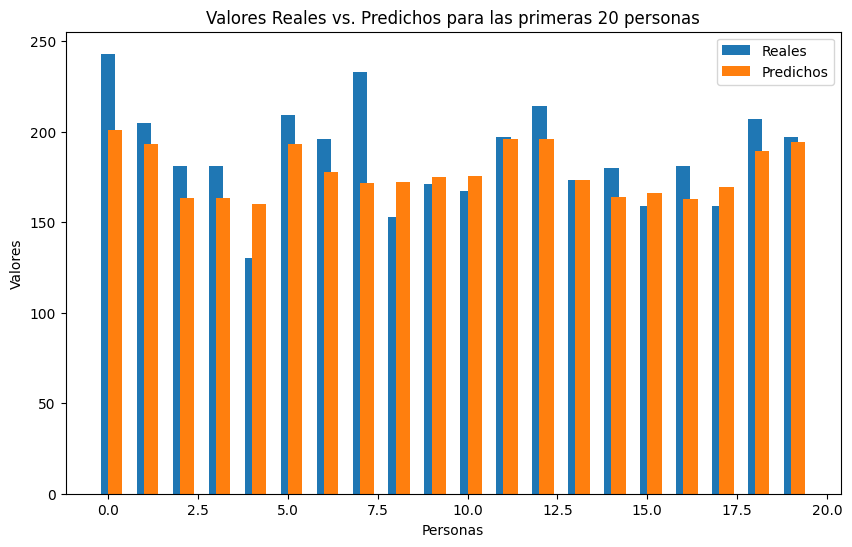

In [ ]:
# Obtén los primeros 100 valores reales y predichos
y_reales = y_test[:20]
y_predichos = y_pred_recuperacion[:20]

# Crea un array de índices para las personas (0, 1, 2, ..., 99)
personas = range(20)

# Crea la figura y los ejes del gráfico
plt.figure(figsize=(10, 6))
plt.bar(personas, y_reales, width=0.4, label='Reales', align='center')
plt.bar(personas, y_predichos, width=0.4, label='Predichos', align='edge')

# Etiqueta los ejes y agrega una leyenda
plt.xlabel('Personas')
plt.ylabel('Valores')
plt.legend()

# Muestra el gráfico
plt.title('Valores Reales vs. Predichos para las primeras 20 personas')
plt.show()